In [128]:
import pandas as pd
import numpy as np
%matplotlib inline

In [162]:
import warnings
warnings.filterwarnings('ignore')

In [163]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [164]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [165]:
from pmdarima import auto_arima

In [166]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')
    
    labels = ['ADF test statistic','p-value','# lags used','# bservations']
    out=pd.Series(result[0:4],index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())
    
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to Reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [167]:
df2 = pd.read_csv('sample.csv', index_col='Date',parse_dates=True)
df2.index.freq='MS'

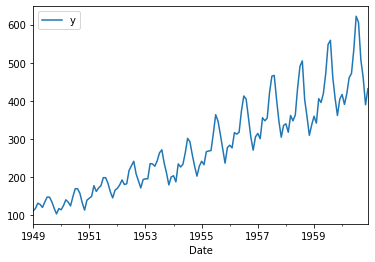

In [168]:
df2.plot()

In [169]:
from statsmodels.tsa.seasonal import seasonal_decompose

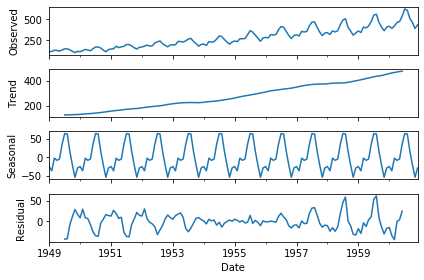

In [170]:
result = seasonal_decompose(df2['y'],model='add')
result.plot();

In [171]:
auto_arima(df2['y'],seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Tue, 14 Jan 2020   AIC                           1344.044
Time:                        23:57:36   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6619      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.887      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.753      0.000      -0.958      -0.861
ma.L1         -1.9079      0.357     -5.351      0.000      -2.607      -1.209
ma.L2          0.9977      0.372      2.679      0.007       0.268       1.728
sigma2       611.8029    247.773      2.469      0.014     126.176    1097.430
===================================================================================
Ljung-Box (Q):                      358.20   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [141]:
from statsmodels.tsa.statespace.tools import diff

In [144]:
df2['Diff_1'] = diff(df2['y'],k_diff=2)

In [145]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.638423e+01
p-value                 2.732892e-29
# lags used             1.100000e+01
# bservations           1.300000e+02
critical value (1%)    -3.481682e+00
critical value (5%)    -2.884042e+00
critical value (10%)   -2.578770e+00
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


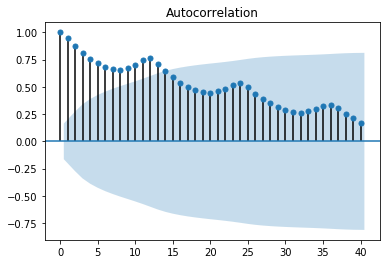

In [147]:
plot_acf(df2['y'],lags=40);

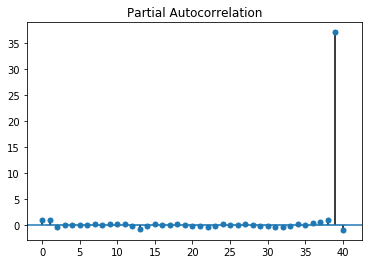

In [148]:
plot_pacf(df2['y'],lags=40);

In [150]:
stepwise_fit = auto_arima(df2['y'],start_p=0,start_q=0,max_p=2,max_q=2,
                         seasonal=False,trace=True)
stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=1415.278, BIC=1421.203, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=1403.473, BIC=1412.361, Fit time=0.071 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=1398.827, BIC=1407.716, Fit time=0.088 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=1413.909, BIC=1416.872, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=1396.121, BIC=1407.972, Fit time=0.155 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=1361.693, BIC=1376.507, Fit time=0.304 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 0); AIC=1371.827, BIC=1386.641, Fit time=0.167 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Tue, 14 Jan 2020   AIC                           1344.044
Time:                        23:28:24   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6619      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.887      0.000       1.593       1.703
ar.L2         -0.9096      0.025    -36.753      0.000      -0.958      -0.861
ma.L1         -1.9079      0.357     -5.351      0.000      -2.607      -1.209
ma.L2          0.9977      0.372      2.679      0.007       0.268       1.728
sigma2       611.8029    247.773      2.469      0.014     126.176    1097.430
===================================================================================
Ljung-Box (Q):                      358.20   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
len(df2)

144

In [152]:
train = df2.iloc[:100]
test = df2.iloc[100:]

In [153]:
model = ARIMA(train['y'],order=(2,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   98
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -446.639
Method:                       css-mle   S.D. of innovations             22.535
Date:                Tue, 14 Jan 2020   AIC                            903.279
Time:                        23:28:37   BIC                            916.204
Sample:                    03-01-1949   HQIC                           908.507
                         - 04-01-1957                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.084      0.100      0.920      -0.157       0.174
ar.L1.D2.y     0.2629      0.099      2.651      0.009       0.069       0.457
ar.L2.D2.y    -0.2074      0.101     -2.050      0.043      -0.406      -0.009
ma.L1.D2.y    -1.0000      0.026    -38.564      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6340           -2.1026j            2.1961           -0.2034
AR.2            0.6340           +2.1026j            2.1961            0.2034
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [154]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start,end=end,typ='levels')

In [155]:
predictions

1957-05-01    337.288502
1957-06-01    338.935356
1957-07-01    344.401515
1957-08-01    348.317241
1957-09-01    351.041397
1957-10-01    353.781760
1957-11-01    356.781450
1957-12-01    359.853949
1958-01-01    362.899807
1958-02-01    365.931556
1958-03-01    368.973109
1958-04-01    372.028157
1958-05-01    375.092709
1958-06-01    378.164954
1958-07-01    381.245240
1958-08-01    384.334036
1958-09-01    387.431392
1958-10-01    390.537225
1958-11-01    393.651503
1958-12-01    396.774233
1959-01-01    399.905425
1959-02-01    403.045080
1959-03-01    406.193196
1959-04-01    409.349772
1959-05-01    412.514808
1959-06-01    415.688305
1959-07-01    418.870263
1959-08-01    422.060682
1959-09-01    425.259561
1959-10-01    428.466900
1959-11-01    431.682701
1959-12-01    434.906962
1960-01-01    438.139683
1960-02-01    441.380865
1960-03-01    444.630508
1960-04-01    447.888612
1960-05-01    451.155176
1960-06-01    454.430201
1960-07-01    457.713686
1960-08-01    461.005632


In [159]:
df2 = pd.read_csv('sample.csv')
len(df2)

144

In [160]:
test

,y,Diff_1
Date,,
1957-05-01,355,15.0
1957-06-01,422,60.0
1957-07-01,465,-24.0
1957-08-01,467,-41.0
1957-09-01,404,-65.0
1957-10-01,347,6.0
1957-11-01,305,15.0
1957-12-01,336,73.0
1958-01-01,340,-27.0


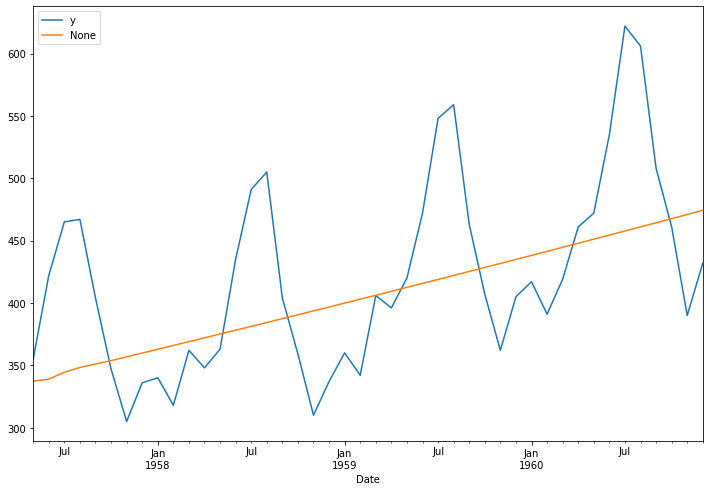

In [172]:
test['y'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)